In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#from clean_data import * 

In [3]:
clean_data = pd.read_csv("housing_new.csv")
train =clean_data.iloc[:,1:]
train

SalePrice        PID  GrLivArea  MSSubClass  LotFrontage  LotArea  \
0        126000  909176150        856          30         60.0     7890   
1        139500  905476230       1049         120         42.0     4235   
2        124900  911128020       1001          30         60.0     6060   
3        114000  535377150       1039          70         80.0     8146   
4        227000  534177230       1665          60         70.0     8400   
...         ...        ...        ...         ...          ...      ...   
6793     121000  903205040        952          30         60.0     8854   
6794     139600  905402060       1733          20         60.0    13680   
6795     145000  909275030       2002          90         82.0     6270   
6796     217500  907192040       1842          60         60.0     8826   
6797     215000  906223180       1911          60         80.0     9554   

      Street  Alley  Condition1  Condition2  ...  FireplaceQu__No Fireplace  \
0          1   -0.1           0         0.0  ...                          0   
1          1   -0.1           0         0.0  ...                          1   
2          1   -0.1           0         0.0  ...                          1   
3          1   -0.1           0         0.0  ...                          1   
4          1   -0.1           0         0.0  ...                          1   
...      ...    ...         ...         ...  ...                        ...   
6793       1   -0.1           0         0.0  ...                          0   
6794       1   -0.1           0         0.0  ...                          0   
6795       1   -0.1           0         0.0  ...                          1   
6796       1   -0.1           0         0.0  ...                          0   
6797       1   -0.1           0         0.0  ...                          0   

      FireplaceQu__Po  FireplaceQu__TA  GarageFinish__No Garage  \
0                   0                0                        0   
1                   0                0                        0   
2                   0                0                        0   
3                   0                0                        0   
4                   0                0                        0   
...               ...              ...                      ...   
6793                0                0                        0   
6794                0                0                        0   
6795                0                0                        0   
6796                0                1                        0   
6797                0                1                        0   

      GarageFinish__RFn  GarageFinish__Unf  Fence__GdWo  Fence__MnPrv  \
0                     0                  1            0             0   
1                     0                  0            0             0   
2                     0                  1            0             0   
3                     0                  1            0             0   
4                     0                  0            0             0   
...                 ...                ...          ...           ...   
6793                  0                  1            0             0   
6794                  0                  1            0             0   
6795                  0                  1            0             0   
6796                  0                  0            0             0   
6797                  1                  0            0             0   

      Fence__MnWw  Fence__No Fence  
0               0                1  
1               0                1  
2               0                1  
3               0                1  
4               0                1  
...           ...              ...  
6793            0                1  
6794            0                1  
6795            0                1  
6796            0                1  
6797            0                1  

[6798 rows x 178 columns]

In [4]:

Y = train['SalePrice']/train['TotalSF']

In [5]:
pmin = min(Y)
print(pmin)

pmax = max(Y)
print(pmax)

print(train.shape)
print(Y.shape)

train.columns


23.353573096683792
138.12544045102186
(6798, 178)
(6798,)


Index(['SalePrice', 'PID', 'GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'Condition1', 'Condition2',
       ...
       'FireplaceQu__No Fireplace', 'FireplaceQu__Po', 'FireplaceQu__TA',
       'GarageFinish__No Garage', 'GarageFinish__RFn', 'GarageFinish__Unf',
       'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw', 'Fence__No Fence'],
      dtype='object', length=178)

In [6]:
train['target'] = train['SalePrice']/train['TotalSF']
import folium
import branca.colormap as cm

#colormap = cm.LinearColormap(colors=['blue','red'], index=[40000,500000],vmin=40000,vmax=625000)

colormap = cm.StepColormap(
    colors=['#00ae53', '#86dc76', '#daf8aa',
            '#ffe6a4', '#ff9a61', '#ee0028'],
    vmin=min(Y),
    vmax=max(Y),
    index=[20, 40, 60, 80, 100, 120, 140])



map1 = folium.Map(
    location=[42.018,-93.6465],
    tiles='cartodbpositron',
    zoom_start=12.4,
)
train.apply(lambda row:folium.Circle(location=[row["lat"], row["long"]], radius=((row['income'])**2/1e8), fill=True, color=colormap(row['target'])).add_to(map1), axis=1)


map1.save('map.html')
map1


# map for houses, radius = income and color = price/SF

Since houses are priced by their size, it makes sense that the SALE PRICE and the total SF are strongly correlated. 

Coefficient of determination: 0.68


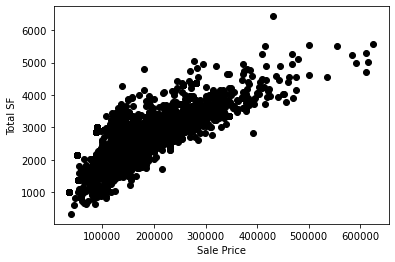

In [7]:
# Ground Living Area and Total Sf.
# plt.scatter(train['SalePrice'],train['TotalSF'])
# plt.ylabel('Total size [sf]')
# plt.xlabel('Sales Price')


# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['SalePrice']],train['TotalSF'])
Y_P =  lm.predict(train[['SalePrice']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['TotalSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['SalePrice']], train['TotalSF'],  color='black')
#plt.plot(train[['SalePrice']], Y_P, color='blue', linewidth=3)

plt.xlabel('Sale Price')
plt.ylabel('Total SF')


plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


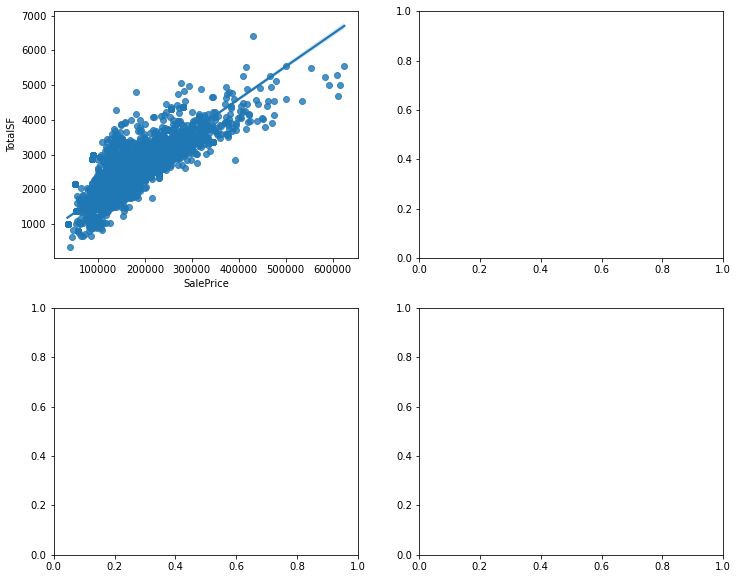

In [8]:

fig, axes = plt.subplots(ncols=2, nrows= 2,figsize=(12,10))


ax_curr = axes[0, 0]
sns.regplot(train[['SalePrice']], train['TotalSF'], ax = ax_curr)
plt.show()

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


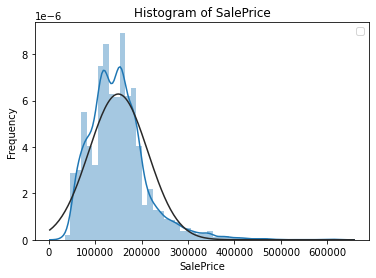

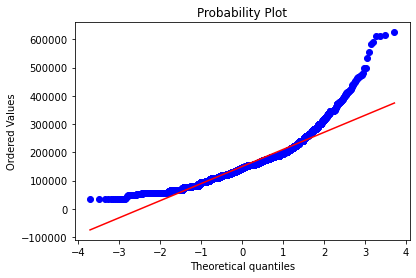

In [9]:
mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')

sns.distplot(train['SalePrice'], fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');
plt.savefig('./Figures/SalePrice_distrib.png', bbox_inches = 'tight', dpi=350)


fig = plt.figure()
res = probplot(train['SalePrice'], plot=plt);
plt.savefig('./Figures/SalePrice_prod.png', bbox_inches = 'tight', dpi=350)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


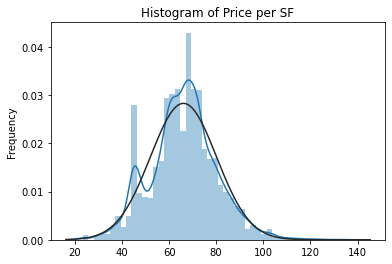

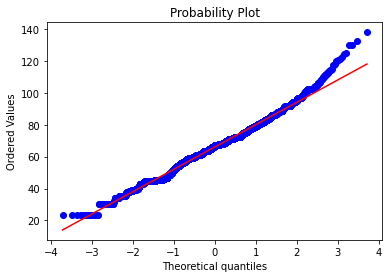

In [10]:
mu, sigma = norm.fit(Y)
sns.distplot(Y, fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of Price per SF');
plt.savefig('./Figures/price_SF_distrib.png', bbox_inches = 'tight', dpi=350)


fig = plt.figure()
res = probplot(Y, plot=plt);
plt.savefig('./Figures/price_SF_prod.png', bbox_inches = 'tight', dpi=350)

Explore some relationships

In [11]:
train['PricePerSF'] = train['SalePrice']/train['TotalSF']

In [12]:
X1=train
X1.columns

Index(['SalePrice', 'PID', 'GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'Condition1', 'Condition2',
       ...
       'FireplaceQu__TA', 'GarageFinish__No Garage', 'GarageFinish__RFn',
       'GarageFinish__Unf', 'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw',
       'Fence__No Fence', 'target', 'PricePerSF'],
      dtype='object', length=180)

### Features that were created for analysis
- distance to university was found with geopy
- income per census tract was added (does not necessary line up with the neighborhood.)
- NA in LotFrontage were filled with median 
- NA in income were filled with median
- Finished Basement area was calculated using Total Bsmt SF - Basement unfinished SF
- Total SF (part of target) was calculated using Total BsmtSF + first FL SF + second FL SF
- bsmt above ground ration is calculated by dividing the total Bsmt SF by the first + second flr SF
- Basement ration is calculated by finished/totalBsmt SF
- Bedr ratio is calculated by Bedroom above Grd/ total rms (--> larger number means more bdr than other rms)
- 

Coefficient of determination: 0.03


Text(0, 0.5, 'dist')

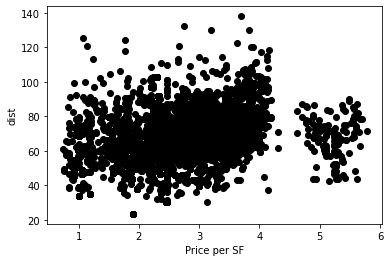

In [14]:
# Income
lm = LinearRegression()
# fitting the training data
lm.fit(train[['dist']],train['PricePerSF'])
Y_P =  lm.predict(train[['dist']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['PricePerSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['dist']], train['PricePerSF'],  color='black')
#plt.plot(train[['dist']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('dist')


In [ ]:
grouped = train[['PricePerSF', 'bedr_ratio_bins']].groupby(['bedr_ratio_bins']).median().sort_values(by='bedr_ratio_bins')

plt.figure(figsize=(12,8))
b =sns.boxplot(x=train.bedr_ratio_bins, y=train.PricePerSF, order=grouped.index)
 
b.set_xlabel("Bedrooms vs total rooms", fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/bedr_ratio.png', bbox_inches = 'tight', dpi=350)

In [ ]:
train['Bsmt_ratio_bins'] = pd.cut(train['Bsmt_ratio'],bins = np.arange(0,1.1, 0.1))


In [ ]:
grouped = train[['PricePerSF', 'Bsmt_ratio_bins']].groupby(['Bsmt_ratio_bins']).median().sort_values(by='Bsmt_ratio_bins')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.Bsmt_ratio_bins, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("Ratio finished to unfinished Basement",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/Bsmt_ratio_bins.png', bbox_inches = 'tight', dpi=350)

In [ ]:
train['bsmt_above_ratio_bins'] = pd.cut(X1['bsmt_above_ratio'],bins = np.arange(0,1.1, 0.1))


In [ ]:
grouped = train[['PricePerSF', 'bsmt_above_ratio_bins']].groupby(['bsmt_above_ratio_bins']).median().sort_values(by='bsmt_above_ratio_bins')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.bsmt_above_ratio_bins, y=train.PricePerSF, order=grouped.index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Ratio of Basement to above ground area",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/bsmt_above_ratio.png', bbox_inches = 'tight', dpi=250)

In [ ]:
grouped = train[['PricePerSF', 'OverallQual']].groupby(['OverallQual']).median().sort_values(by='OverallQual')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.OverallQual, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("Overall Quality",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/Overall_Qual', bbox_inches = 'tight', dpi=350)

In [ ]:
grouped = train[['PricePerSF', 'bathrm_cnt']].groupby(['bathrm_cnt']).median().sort_values(by='bathrm_cnt')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.bathrm_cnt, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("Kitchen Quality",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/bathrm_cnt', bbox_inches = 'tight', dpi=350)

In [ ]:
grouped = train[['PricePerSF', 'KitchenQual']].groupby(['KitchenQual']).median().sort_values(by='KitchenQual')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.KitchenQual, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("KitchenQual",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/Kitchen_Qual', bbox_inches = 'tight', dpi=350)

In [ ]:
grouped

In [ ]:
(35 + 25 +15)/3 



In [ ]:
print(train[train['Bsmt_ratio'] == 0].shape)
print(train[train['Bsmt_ratio'] == 1].shape)
unfin = train[train['Bsmt_ratio'] == 0]['PricePerSF'].mean()
fin = train[train['Bsmt_ratio'] == 1]['PricePerSF'].mean()

fin - unfin

In [ ]:
grouped = train[['PricePerSF', 'bathrm_cnt']].groupby(['bathrm_cnt']).median().sort_values(by='bathrm_cnt')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.bathrm_cnt, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("bathrm_cnt",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/bathrm_cnt', bbox_inches = 'tight', dpi=350)

In [ ]:
grouped

In [ ]:
# Average price increase per half bathroom

17.3/5


In [ ]:
train[train['TotalSF'] > 2860].shape

In [ ]:
plt.figure(figsize=(20,10))

grouped = train[['PricePerSF', 'Neighborhood']].groupby(['Neighborhood']).median().sort_values(by='PricePerSF')

plt.figure(figsize=(8,15))
sns.boxplot(y = train.Neighborhood, x = train.PricePerSF, order=grouped.index)

b.set_ylabel("")
b.set_xlabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/Hoods', bbox_inches = 'tight', dpi=350)

In [ ]:
# grouped = train[['PricePerSF', 'BedroomAbvGr']].groupby(['BedroomAbvGr']).median().sort_values(by='BedroomAbvGr')

# sns.boxplot(x=train.BedroomAbvGr, y=train.PricePerSF, order=grouped.index)

In [ ]:
X1.columns

In [ ]:
# grouped = train[['PricePerSF', 'TotRmsAbvGrd']].groupby(['TotRmsAbvGrd']).median().sort_values(by='TotRmsAbvGrd')

# sns.boxplot(x=train.TotRmsAbvGrd, y=train.PricePerSF, order=grouped.index)

In [ ]:
grouped = train[['PricePerSF', 'HouseStyle']]\
.groupby(['HouseStyle']).median().sort_values(by='PricePerSF')

plt.figure(figsize=(15,8))
sns.boxplot(x=train.HouseStyle, y=train.PricePerSF, order=grouped.index)
plt.savefig('./Figures/House_style', bbox_inches = 'tight', dpi=350)

In [ ]:
plt.figure(figsize=(25,8))

grouped = train[['PricePerSF', 'YearRemodAdd']].groupby(['YearRemodAdd']).median().sort_values(by='YearRemodAdd')
grouped
b = sns.boxplot(x = train.YearRemodAdd, y  = train.PricePerSF, order=grouped.index)
plt.xticks(rotation = 90)

b.set_xlabel("Year build or remodeled",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/Yr_remodel', bbox_inches = 'tight', dpi=350)

In [ ]:
train.columns

In [ ]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['PricePerSF']],train['GarageArea'])
Y_P =  lm.predict(train[['PricePerSF']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['GarageArea'], Y_P))

# ## Plot outputs
plt.scatter(train[['PricePerSF']], train['GarageArea'],  color='black')
plt.plot(train[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('GarageArea')


#plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

In [ ]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['PricePerSF']],train['FinBsmtSF'])
Y_P =  lm.predict(train[['PricePerSF']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['FinBsmtSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['PricePerSF']], train['FinBsmtSF'],  color='black')
plt.plot(train[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('FinBsmtSF')



In [ ]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['PricePerSF']],train['LotArea'])
Y_P =  lm.predict(train[['PricePerSF']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['LotArea'], Y_P))

# ## Plot outputs
plt.scatter(train[['PricePerSF']], train['LotArea'],  color='black')
plt.plot(train[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('LotArea')


#plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

In [ ]:
## Load models
import pickle

with open("Pickle_xgbooster.pkl" , 'rb') as file:  
     XGBoost = pickle.load(file)

In [ ]:
from clean_data_test import X1_test, Y_test

In [ ]:
XGscore = XGBoost.score(X1_test, Y_test)
print(XGscore)
predictions_test = XGBoost.predict(X1_test)
XGrmse = np.sqrt(mean_squared_error(predictions_test, Y_test))
print(XGrmse)


importances = list(XGBoost.best_estimator_.feature_importances_)
var_list = list(X1_test.columns)
var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})

var_importances['Abs Importance'] = abs(var_importances['Importance'])
XGboost_importances =var_importances.sort_values(by = 'Abs Importance', ascending = False)
XGboost_importances


# randfor_features = var_importances.sort_values("Importance",ascending=False)
# randfor_features
ranking = list(range(1,XGboost_importances.shape[0]+1))
XGboost_importances['ranking'] = ranking
XGboost_importances

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y = XGboost_importances.Predictor.iloc[0:5],
            x = XGboost_importances.Importance.iloc[0:5], 
           palette='Greens_r')
b.set_ylabel("XGBoost importance")
b.set_xlabel("Feature",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/XGBoost_features', bbox_inches = 'tight', dpi=350)

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y = XGboost_importances.Predictor.iloc[-6:-1], 
            x = XGboost_importances.Importance.iloc[-6:-1],
           palette='Reds')
b.set_ylabel("XGBoost importance")
b.set_xlabel("Feature",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/XGBoost_features_bottom', bbox_inches = 'tight', dpi=350)

In [ ]:
zero = int(XGboost_importances[['ranking']][XGboost_importances['Abs Importance'] == 0].iloc[0])
type(zero)


XGboost_importances['ranking'][XGboost_importances['Abs Importance'] == 0] = zero
XGboost_importances

# Random forest

In [ ]:
import pickle
randfor = pickle.load(open('data/final_randomforest.sav', 'rb'))

In [ ]:
#randfor.best_score_
rand_score = randfor.score(X1_test, Y_test)
print(rand_score)
predictions_test = randfor.predict(X1_test)
rand_rmse = np.sqrt(mean_squared_error(predictions_test, Y_test))
print(rand_rmse)


importances = list(randfor.best_estimator_.feature_importances_)
var_list = list(X1_test.columns)
var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})
var_importances

var_importances['Abs Importance'] = abs(var_importances['Importance'])
randfor_importances =var_importances.sort_values(by = 'Abs Importance', ascending = False)
randfor_importances


# randfor_features = var_importances.sort_values("Importance",ascending=False)
# randfor_features
ranking = list(range(1,randfor_importances.shape[0]+1))
randfor_importances['ranking'] = ranking
randfor_importances

# Lasso

In [ ]:

## Load models
import pickle

with open("data/Pickle_lasso.pkl" , 'rb') as file:  
     lasso = pickle.load(file)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X1)
features = scaler.transform(X1)
X1_std = pd.DataFrame(features, columns = X1.columns)

scaler = StandardScaler().fit(X1_test)
features = scaler.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [ ]:
lasso_score = lasso.score(X1_std_test,Y_test)
print(lasso_score)
pred = lasso.predict(X1_std_test)
lasso_rmse = mean_squared_error(Y_test, pred, squared = False)
print(lasso_rmse)

In [ ]:
las_imp = pd.DataFrame()

las_imp['Feature'] = X1_std_test.columns
las_imp['Importance'] = list(lasso.coef_)
las_imp['Abs Importance'] = abs(las_imp['Importance'])
las_imp = las_imp.sort_values(by = 'Abs Importance', ascending = False)
las_imp



ranking = list(range(1,las_imp.shape[0]+1))
las_imp['ranking'] = ranking
las_imp

# Decision Tree

In [ ]:

# ## Load models
# import pickle

# with open("data/Pickle_dec_tree.pkl" , 'rb') as file:  
#      dec_tree = pickle.load(file)

In [ ]:
# #randfor.best_score_
# print(dec_tree.best_estimator_.score(X1_test,Y_test))

# print(dec_tree.score(X1_test, Y_test))
# predictions_test = randfor.predict(X1_test)
# print(np.sqrt(mean_squared_error(predictions_test, Y_test)))


# importances = list(dec_tree.best_estimator_.feature_importances_)
# var_list = list(X1_test.columns)
# var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})

# dec_tree_features = var_importances.sort_values("Importance",ascending=False)
# dec_tree_features
# ranking = list(range(1,dec_tree_features.shape[0]+1))
# dec_tree_features['ranking'] = ranking
# dec_tree_features

In [ ]:
## Load models
import pickle

with open("data/Pickle_SVR.pkl" , 'rb') as file:  
     svm = pickle.load(file)
        
with open("data/scaler.pkl" , 'rb') as file:  
     sc = pickle.load(file)

In [ ]:
features = sc.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [ ]:
svm_score = svm.score(X1_std_test, Y_test)
print(svm_score)
predictions_test = svm.predict(X1_std_test)
svm_rmse = np.sqrt(mean_squared_error(predictions_test, Y_test))
print(svm_rmse)


In [ ]:
svm_imp = pd.DataFrame()

svm_imp['Feature'] = X1_std_test.columns
svm_imp['Importance'] = svm.best_estimator_.coef_.reshape(-1,1)
svm_imp['Abs Importance'] = abs(svm_imp['Importance'])
svm_imp = svm_imp.sort_values(by = 'Abs Importance', ascending = False)
svm_imp



ranking = list(range(1,svm_imp.shape[0]+1))
svm_imp['ranking'] = ranking
svm_imp

In [ ]:
# Rank all features

# svm_imp
# las_imp
#randfor_importances
#XGboost_importances 

all_feat = XGboost_importances[['Predictor','ranking']].merge(randfor_importances[['Predictor','ranking']],
                                                              left_on = 'Predictor', right_on = 'Predictor')
all_feat.columns = ['Feature','XGboost','random_for']
all_feat = all_feat.merge(las_imp[['Feature','ranking']],left_on = 'Feature', right_on = 'Feature')
all_feat = all_feat.merge(svm_imp[['Feature','ranking']],left_on = 'Feature', right_on = 'Feature')
all_feat.columns = ['Feature','XGboost','random_for','lasso','svm']

all_feat['overall_rank'] = (all_feat['XGboost'] + all_feat['random_for'] + all_feat['lasso'] + all_feat['svm'])
all_feat['overall_rank'] = all_feat['overall_rank']/4
all_feat = all_feat.sort_values(by = 'overall_rank', ascending = True)
all_feat

In [ ]:
plt.figure(figsize=(8,12))

b = sns.scatterplot(y = all_feat['Feature'], x = all_feat['XGboost'],  color='gray')
sns.scatterplot(y = all_feat['Feature'], x = all_feat['lasso'],  color='gray')
sns.scatterplot(y = all_feat['Feature'], x = all_feat['svm'],  color='gray')
sns.scatterplot(y = all_feat['Feature'], x = all_feat['random_for'], color='gray')
b = sns.scatterplot(y = all_feat['Feature'], x = all_feat['overall_rank'],  color='red')

#plt.xlabel('Ranking', fontsize = 16) 
#plt.ylabel('Features', fontsize = 16)
b.set_ylabel("")
b.set_xlabel("Ranking",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/feature_imp', bbox_inches = 'tight', dpi=350)


In [ ]:
top = all_feat.iloc[0:10]
bottom = all_feat.iloc[-11:-1]

top_bottom = top.append(bottom)
plt.figure(figsize=(8,12))

b = sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['XGboost'],  color='gray')
sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['lasso'],  color='gray')
sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['svm'],  color='gray')
sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['random_for'], color='gray')
b = sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['overall_rank'],  color='red')

b.set_ylabel("")
b.set_xlabel("Ranking",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/top_bottom_feature_imp', bbox_inches = 'tight', dpi=350)


## Bar graph for model scores

In [ ]:
scores = pd.DataFrame()
scores['scores'] = [lasso_score, rand_score, XGscore, svm_score]
scores['rmse'] = [lasso_rmse, rand_rmse, XGrmse, svm_rmse]
scores['model']= ['Lasso','RandomForest','XGBoost','SupportVector']
scores

In [ ]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['scores'])

b.set_xlabel("Scores")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8])
b.set_xlim(0.5,0.8)

plt.savefig('./Figures/model_scores', bbox_inches = 'tight', dpi=350)


In [ ]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['rmse'])

b.set_xlabel("RMSE [$/SF]")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([6,6.5,7, 7.5, 8, 8.5, 9 ])
b.set_xlim(6,9)

plt.savefig('./Figures/model_rmse', bbox_inches = 'tight', dpi=350)
